In [2]:
import pandas as pd
import seaborn as sns
import json
import matplotlib.pyplot as plt
import os
os.makedirs("img", exist_ok=True)

In [3]:
ref_metrics = []
for i in range(1, 10):
    with open(f"loss_data/reference_models/f{i}/clipnet_history.json", "r") as f:
        ref_metrics.append(pd.DataFrame(json.load(f)))
        
pers_metrics = []
for i in range(1, 10):
    with open(f"loss_data/personal_models/f{i}/rnn_v10_history.json", "r") as f:
        pers_metrics.append(pd.DataFrame(json.load(f)))

In [4]:
pers_train_loss_curves = pd.DataFrame([pers_metrics[i]["loss"] for i in range(9)])
ref_train_loss_curves = pd.DataFrame([ref_metrics[i]["loss"] for i in range(9)])
pers_val_loss_curves = pd.DataFrame([pers_metrics[i]["val_loss"] for i in range(9)])
ref_val_loss_curves = pd.DataFrame([ref_metrics[i]["val_loss"] for i in range(9)])

pers_train_loss_curves = (
    pers_train_loss_curves
    .reset_index(names="replicate")
    .melt(id_vars="replicate", var_name="epoch", value_name="train_loss")
)
ref_train_loss_curves = (
    ref_train_loss_curves
    .reset_index(names="replicate")
    .melt(id_vars="replicate", var_name="epoch", value_name="train_loss")
)
pers_val_loss_curves = (
    pers_val_loss_curves
    .reset_index(names="replicate")
    .melt(id_vars="replicate", var_name="epoch", value_name="val_loss")
)
ref_val_loss_curves = (
    ref_val_loss_curves
    .reset_index(names="replicate")
    .melt(id_vars="replicate", var_name="epoch", value_name="val_loss")
)

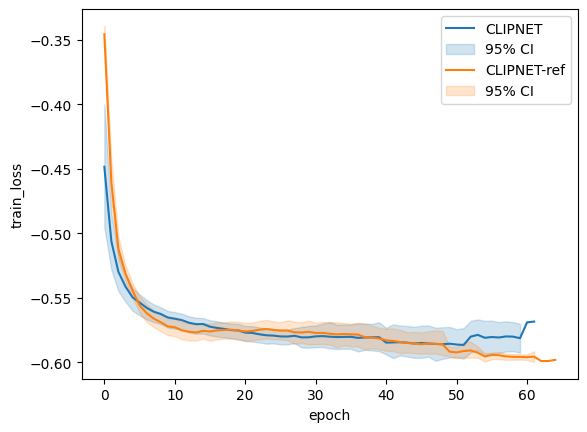

In [5]:
sns.lineplot(data=pers_train_loss_curves, x="epoch", y="train_loss", estimator="mean", errorbar=("ci", 95))
sns.lineplot(data=ref_train_loss_curves, x="epoch", y="train_loss", estimator="mean", errorbar=("ci", 95))
plt.legend(["CLIPNET", "95% CI", "CLIPNET-ref", "95% CI"])
plt.savefig("img/clipnet_loss_curves.pdf")

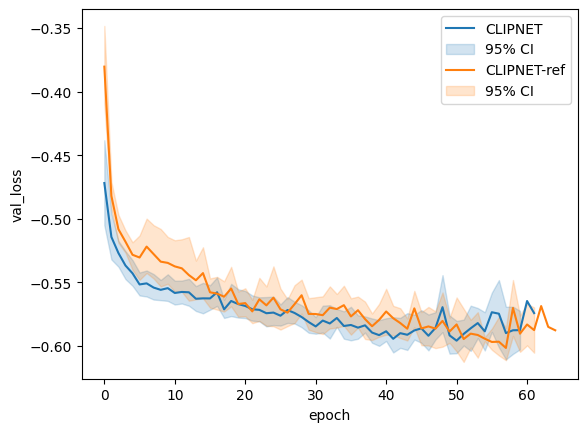

In [6]:
sns.lineplot(data=pers_val_loss_curves, x="epoch", y="val_loss", estimator="mean", errorbar=("ci", 95))
sns.lineplot(data=ref_val_loss_curves, x="epoch", y="val_loss", estimator="mean", errorbar=("ci", 95))
plt.legend(["CLIPNET", "95% CI", "CLIPNET-ref", "95% CI"])
plt.savefig("img/clipnet_val_loss_curves.pdf")